In [58]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rc
from matplotlib import font_manager
import pylab
from sklearn.cluster import DBSCAN, KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA


font_name = font_manager.FontProperties(fname = "/Library/Fonts/AppleGothic.ttf").get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [49]:


ctg1 = pd.read_csv('./naverlabs/ctg1_df_lb.csv')

ctg2 = pd.read_csv('./naverlabs/ctg2_df_lb.csv')

ctg3 = pd.read_csv('./naverlabs/ctg3_df_lb.csv')


ctg12 = pd.read_csv('./naverlabs/ctg1_df.csv')

ctg22 = pd.read_csv('./naverlabs/ctg2_df.csv')

ctg32 = pd.read_csv('./naverlabs/ctg3_df.csv')



In [55]:
ctg1 = ctg12.iloc[:,:-1]
ctg2 = ctg22.iloc[:,:-1]
ctg3 = ctg32.iloc[:,:-1]

In [70]:
year1 = ctg1.iloc[:,61:426]
year2 = ctg2.iloc[:,61:426]
year3 = ctg3.iloc[:,61:426]


In [74]:
year1.T.head()

,패션의류,패션잡화,화장품/미용,디지털/가전,가구/인테리어,출산/육아,식품,스포츠/레저,생활/건강,여행/문화,면세점
2017-10-01,40.80227,49.13728,51.06838,39.00212,47.25003,37.12385,35.07905,48.03982,40.93662,58.61428,40.37712
2017-10-02,37.21913,45.82239,48.41929,38.36769,44.31119,33.73021,33.42819,44.99120,40.25889,55.91643,36.84029
2017-10-03,33.84955,42.19086,43.84796,35.26777,38.11395,29.28534,28.54351,40.70850,36.13111,47.12656,31.38336
2017-10-04,31.79994,41.60900,45.72098,34.66185,37.21577,28.61069,27.88924,38.39374,35.72367,53.53561,31.38336
2017-10-05,38.33199,47.78325,53.70098,39.50399,46.11400,37.13337,33.70529,45.27663,41.84517,70.39250,34.16525


In [ ]:
X= list(year1.columns)
year1.T[['패션의류']].plot(figsize=(100,50),x=X)


In [87]:
monthday = [i*len(year1.columns)/356 for i in [31,30,31,31,28,31,30,31,30,31,31]]

monthday = np.cumsum(monthday)

In [113]:
monthname_loc = [i*len(year1.columns)/356 for i in [15.5,30,31,31,28,31,30,31,30,31,31,30]]

monthname_loc = np.cumsum(monthname_loc)

In [114]:
monthname = ['10월','11월','12월','1월','2월','3월','4월','5월','6월','7월','8월','9월']

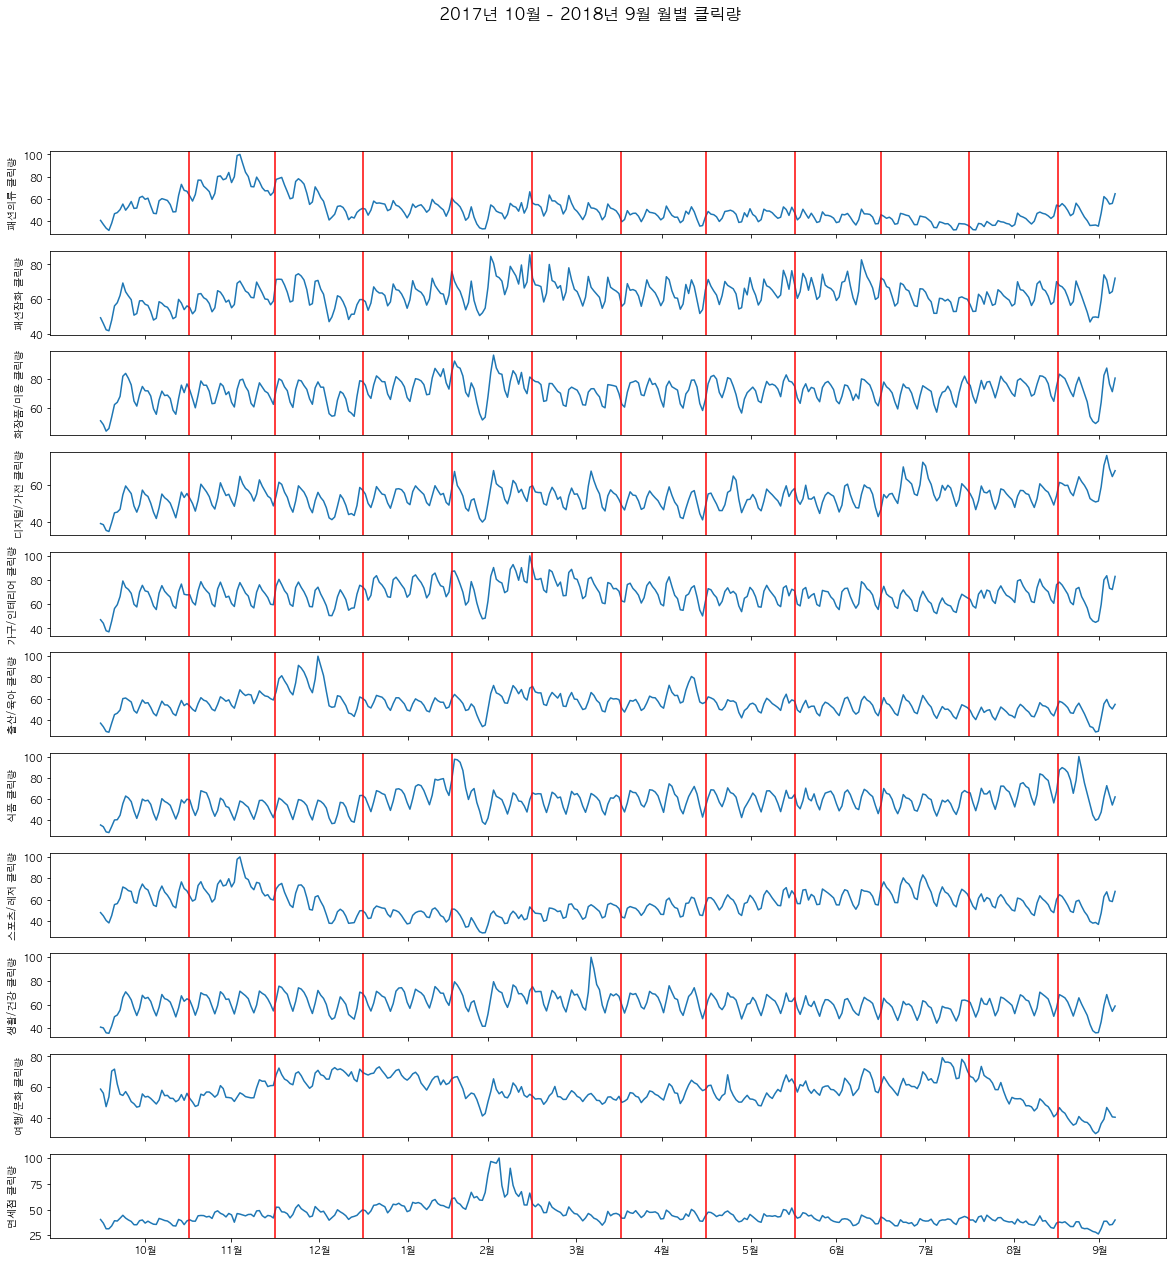

In [117]:

fig, axes = plt.subplots(11,1, figsize=(20,20), sharex=True)
ax = axes.ravel()
X = range(len(year1.columns))

for i in range(11):
    
    ax[i].plot(X,year1.iloc[i].T)
    #ax[i].set_xlabel('월별 클릭량')
    ax[i].set_ylabel('%s 클릭량'%(year1.T.columns[i]))
    [ax[i].axvline(m,  color='r') for m in monthday]
    #ax[i].axvline(x = monthday,color='r')
    #ax[i].set_xticklabels(monthname_loc, np.asarray(monthname))
plt.xticks(monthname_loc, np.asarray(monthname))
    #ax[i].set_xticklabels(np.asarray(month1.index),rotation =90,minor=False)
plt.suptitle('2017년 10월 - 2018년 9월 월별 클릭량', fontsize=16)
    
pylab.savefig('네이버 대분류 분야별 클릭량.png')

In [118]:
year3.head()

,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,2017-10-09,2017-10-10,...,2018-09-21,2018-09-22,2018-09-23,2018-09-24,2018-09-25,2018-09-26,2018-09-27,2018-09-28,2018-09-29,2018-09-30
니트/스웨터,30.54563,27.52761,25.42357,25.18902,28.61857,35.69222,38.38780,41.40460,44.97325,42.36283,...,27.47306,25.38812,25.67995,25.24720,33.40970,46.04178,45.57904,45.72995,48.72645,54.06670
카디건,59.37231,50.42676,45.91125,43.99705,54.07346,68.45936,70.43072,74.34401,79.10855,70.11829,...,49.78095,46.03746,46.81175,45.03848,61.63119,84.17138,84.06044,79.58965,81.55478,89.81095
원피스,38.82156,35.51160,31.77445,29.83230,33.86907,41.29160,43.73769,48.55812,53.29524,47.45541,...,38.99124,39.18516,40.62270,36.63653,45.02596,58.29227,54.53897,50.86204,52.60691,57.39560
티셔츠,52.64488,46.35675,41.38063,40.07175,47.16645,56.64979,61.13039,67.59778,73.82329,69.12011,...,49.54648,48.45184,47.64893,45.37588,61.02888,79.69052,79.10393,74.20478,76.28395,84.73762
블라우스/셔츠,40.96881,37.57330,33.25492,29.52757,32.91040,39.62201,42.05860,46.98544,51.62478,44.56034,...,39.03534,40.12771,36.83575,33.24324,42.87634,54.64825,48.71735,45.23116,47.92376,50.33402


In [121]:
year3.loc['원피스']

,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,2017-10-09,2017-10-10,...,2018-09-21,2018-09-22,2018-09-23,2018-09-24,2018-09-25,2018-09-26,2018-09-27,2018-09-28,2018-09-29,2018-09-30
원피스,38.82156,35.51160,31.77445,29.83230,33.86907,41.29160,43.73769,48.55812,53.29524,47.45541,...,38.99124,39.18516,40.62270,36.63653,45.02596,58.29227,54.53897,50.86204,52.60691,57.39560
원피스,46.02714,40.67093,31.94739,28.26499,35.63682,45.41950,44.74716,50.70539,56.05176,58.95351,...,54.65503,48.85013,42.97348,37.01948,52.92355,73.31176,80.18988,72.20479,63.83711,64.87798
원피스,18.59242,16.14912,13.66689,12.66426,17.21016,21.55164,25.50374,24.67633,31.23722,31.70446,...,17.79421,18.58269,16.52876,13.78370,22.35958,31.83101,34.23537,33.73892,28.65764,31.49031
원피스,30.40431,26.25074,20.05860,18.92890,22.39446,26.95149,28.74798,30.62091,37.56901,35.75554,...,45.26034,41.48900,33.14363,30.08578,40.05351,53.24046,62.12095,57.70406,52.92618,52.34010


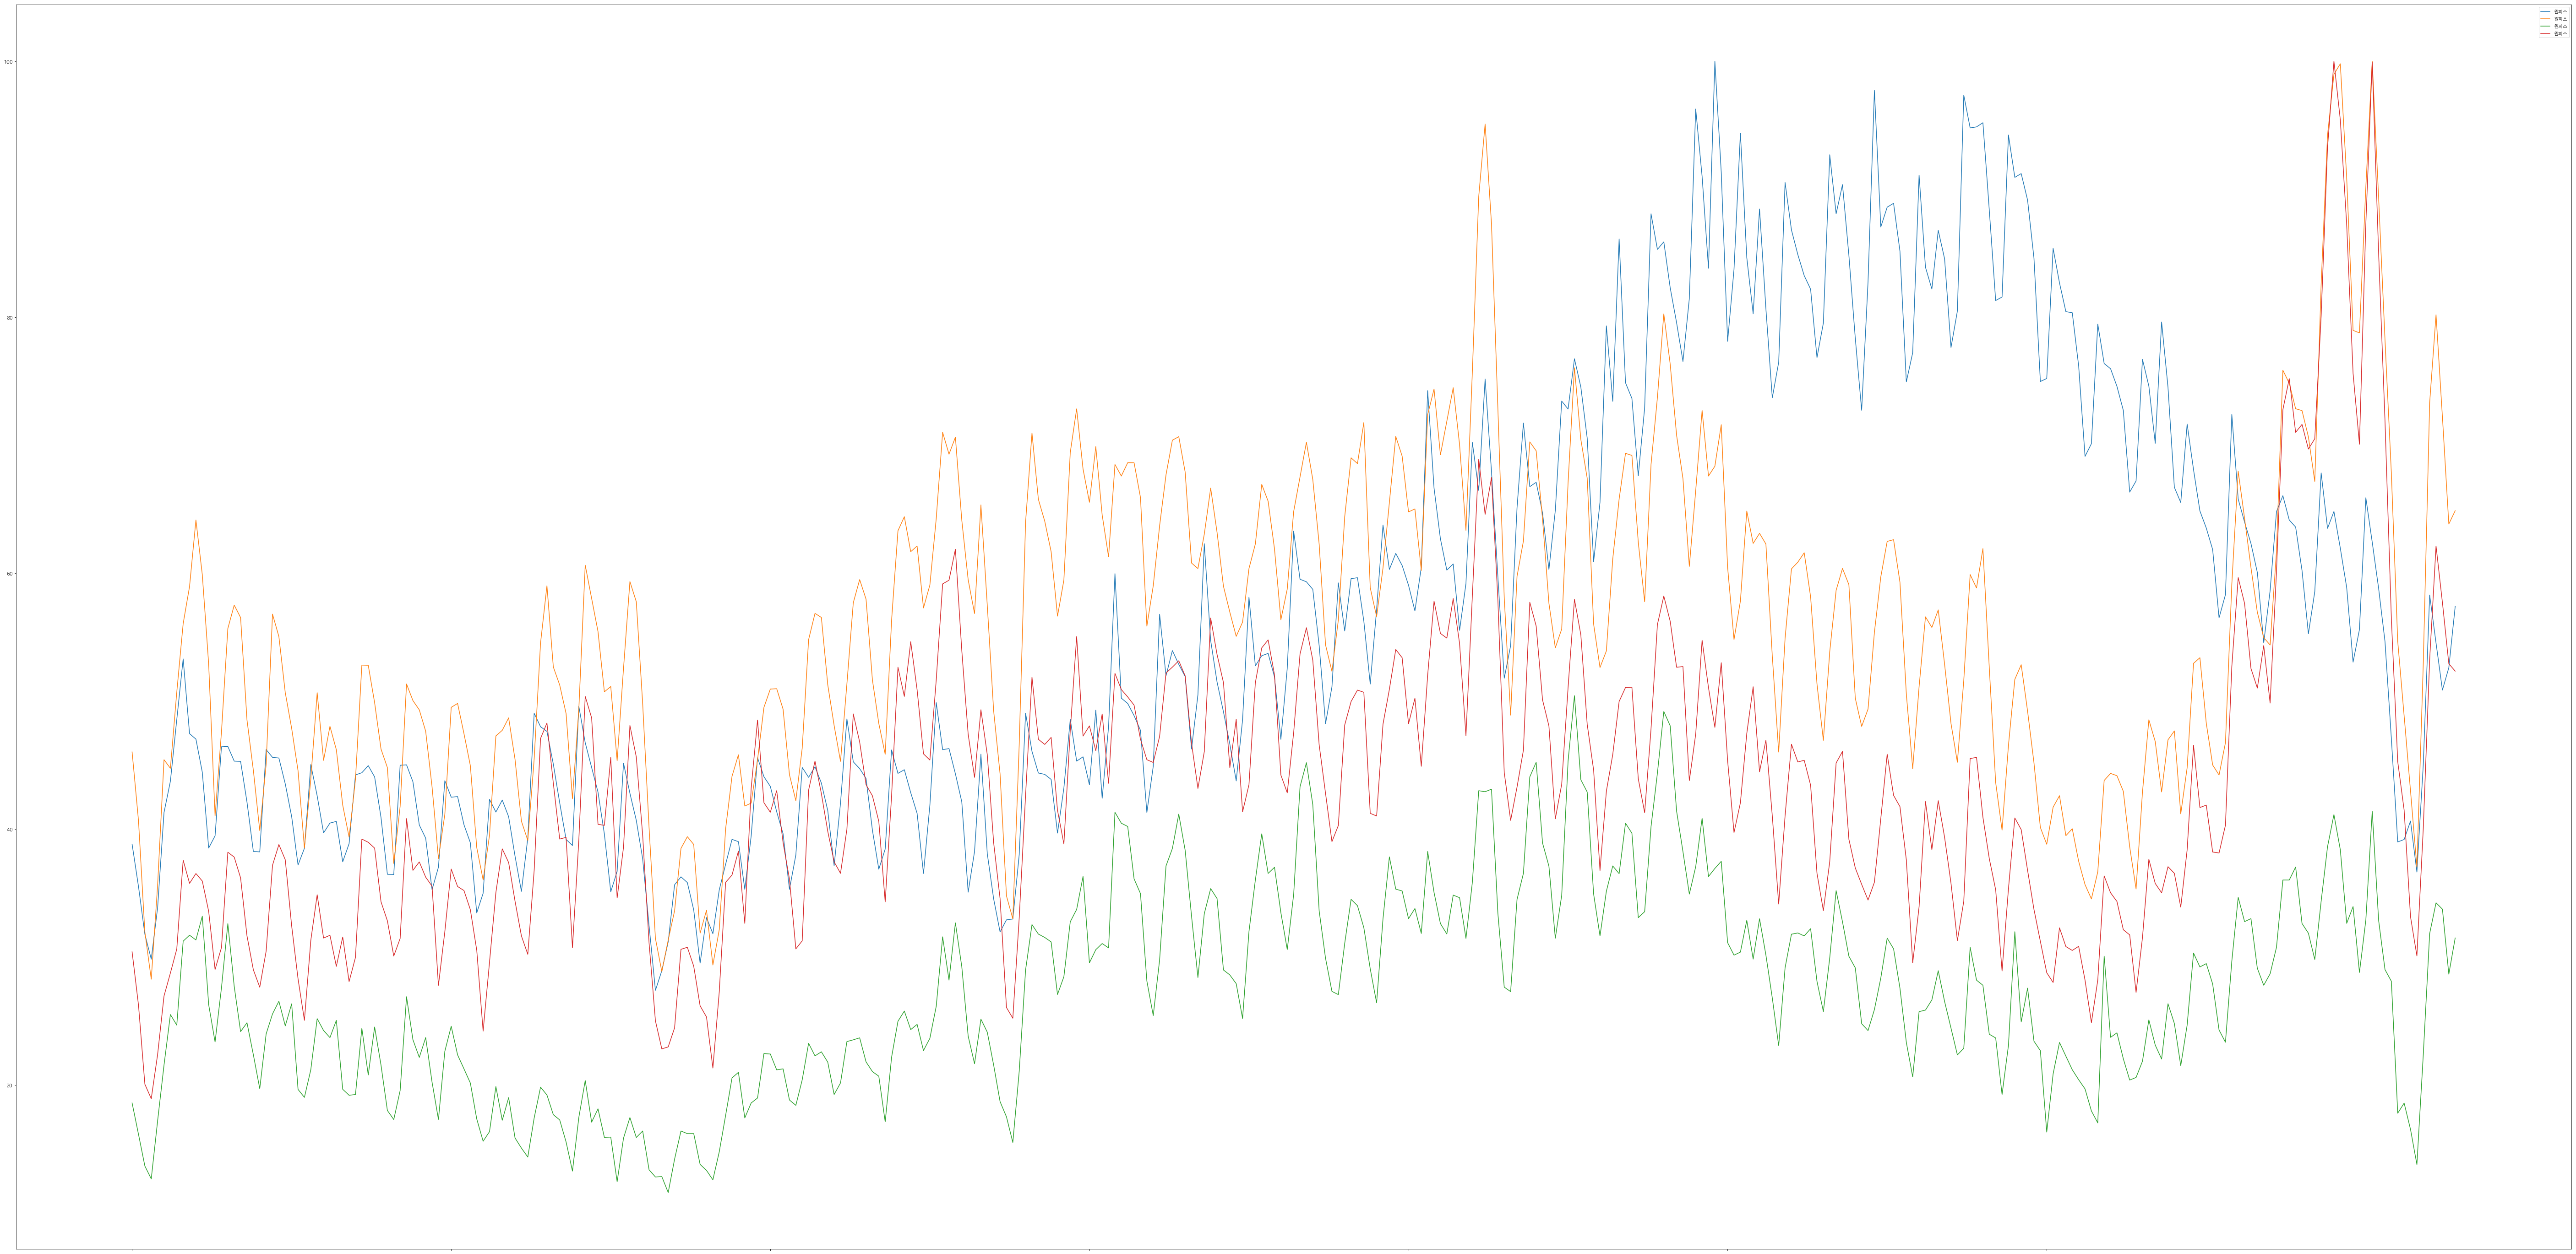

In [120]:

year3.T[['원피스']].plot(figsize=(100,50))



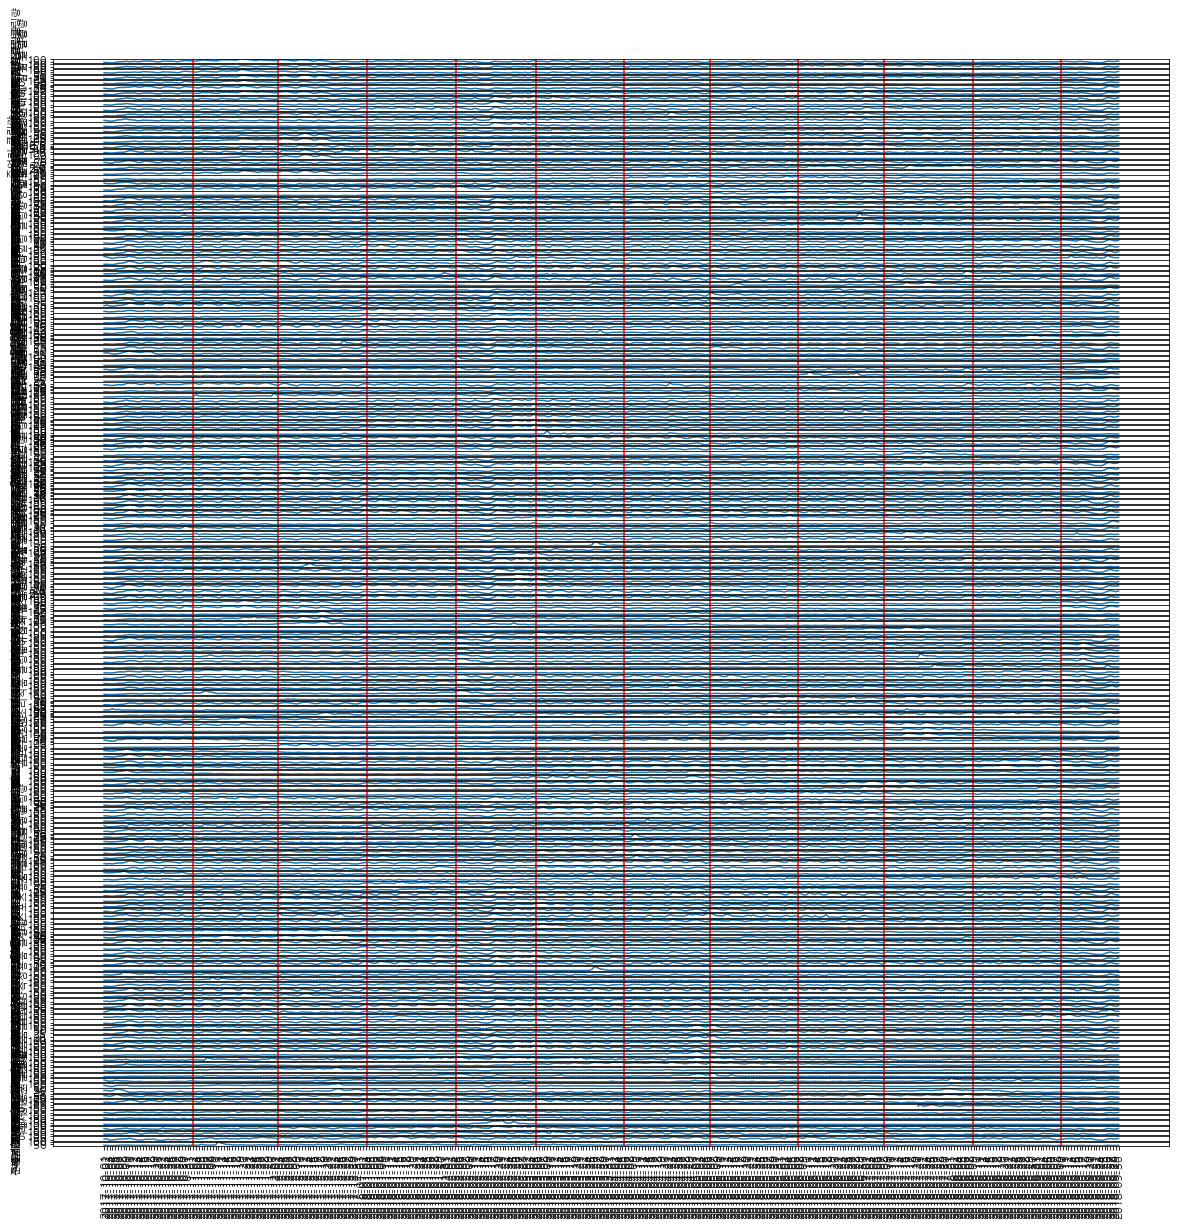

In [96]:
fig, axes = plt.subplots(len(year2),1, figsize=(20,20), sharex=True)
ax = axes.ravel()
X = range(len(year2.columns))

for i in range(len(year2)):
    
    ax[i].plot(X,year2.iloc[i].T)
    ax[i].set_ylabel('%s 클릭량'%(year2.T.columns[i]))
    [ax[i].axvline(m,  color='r') for m in monthday]
    #ax[i].axvline(x = monthday,color='r')
    plt.xticks(range(len(year2.columns)), np.asarray(year2.columns), rotation =90)
    #ax[i].set_xticklabels(np.asarray(month1.index),rotation =90,minor=False)



In [ ]:
pylab.savefig('네이버 중분류 분야별 클릭량.png')